#### Answers submitted by:  Amy C. Geojo
#### Date: 1.7.18
---

# Python Part 3:  Pandas Exercises
---

## Q1:  Read in the libraries you need

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 10

In [3]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [4]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.22.0
Numpy version: 1.14.0


In [5]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.6.2 (default, Nov 15 2017, 12:56:27) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.38)]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [6]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv')

## Q5:  How many rows and columns are in this dataframe?

In [7]:
rows, columns =  df.shape[0],  df.shape[1]
print('There are {} rows and {} columns'.format(
    rows, columns))

There are 572 rows and 11 columns


## Q6:  Print the first 4 rows of the data

In [8]:
df.head(4)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35


## Q7:  How many different data types are in this dataframe, and what are the data types?

In [22]:
num_dtypes = df.dtypes.nunique()
print('There are {} different data types.'.format(
    df.dtypes.nunique())) 
# print("\n")

print("Values are either of type Object or type int64:")
print(df.dtypes.unique())

There are 2 different data types.
Values are either of type Object or type int64:
[dtype('O') dtype('int64')]


## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [23]:
df['sub_region_raw'] = df['Unnamed: 0']

## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [24]:
df.rename({'Unnamed: 0': 'sub_region_desc'}, axis=1, inplace=True)

## Q10:  Rename the column 'area' to:  'sub_region'

In [26]:
df.rename({'area': 'sub_region'}, axis=1, inplace=True)

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [27]:
df.region.nunique()

3

## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [29]:
df.sub_region.nunique() 

9

## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [30]:
df.sub_region_desc.nunique() 

572

In [32]:
df.sub_region_desc.unique()

array(['1.North-Apulia', '2.North-Apulia', '3.North-Apulia',
       '4.North-Apulia', '5.North-Apulia', '6.North-Apulia',
       '7.North-Apulia', '8.North-Apulia', '9.North-Apulia',
       '10.North-Apulia', '11.North-Apulia', '12.North-Apulia',
       '13.North-Apulia', '14.North-Apulia', '15.North-Apulia',
       '16.North-Apulia', '17.North-Apulia', '18.North-Apulia',
       '19.North-Apulia', '20.North-Apulia', '21.North-Apulia',
       '22.North-Apulia', '23.North-Apulia', '24.North-Apulia',
       '25.North-Apulia', '26.Calabria', '27.Calabria', '28.Calabria',
       '29.Calabria', '30.Calabria', '31.Calabria', '32.Calabria',
       '33.Calabria', '34.Calabria', '35.Calabria', '36.Calabria',
       '37.Calabria', '38.Calabria', '39.Calabria', '40.Calabria',
       '41.Calabria', '42.Calabria', '43.Calabria', '44.Calabria',
       '45.Calabria', '46.Calabria', '47.Calabria', '48.Calabria',
       '49.Calabria', '50.Calabria', '51.Calabria', '52.Calabria',
       '53.Calabria', '5

In [35]:
df.sub_region_desc.apply(lambda x: x.split(".")[-1]).unique()

array(['North-Apulia', 'Calabria', 'South-Apulia', 'Sicily',
       'Inland-Sardinia', 'Coast-Sardinia', 'Umbria', 'East-Liguria',
       'West-Liguria'], dtype=object)

### - using apply to strip line numbers & get unique region names

In [38]:
df['sub_region_desc_raw'] = df.sub_region_desc
df['sub_region_desc'] = df.sub_region_desc.apply(lambda x: x.split(".")[-1])

print("There are {} unique values of 'sub_region_desc'\
once line numbers are stripped from the front of the region name".format(
    df.sub_region_desc.nunique())
     )

There are 9 unique values of 'sub_region_desc'once line numbers are stripped from the front of the region name


## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

```python
df.B = df.B.str.replace(r'[\(\)\d]+', '')
df['B'].str.extract(r'.*?([A-Za-z]+).*?', expand=True)
```

### - using `extract` with regex to remove line numbers appended to region names
- regex: capturing group
- `extract(pat, flags=0, expand=None)`
    where `pat`: `str`, regex pattern with capturing groups
    and `flags`: `int`, default `0` (no flags); `re` module flags - ie `re.IGNORECASE` / `re.I`
    and `expand`: `bool`, default `False`; if `True`, return DataFrame, else return `Series/Index/DataFrame` 
    
    
- note pattern cannot be compiled
- `extract` is not a `Series` function but a vectorized string function: `.str.extract()` so don't forget the `.str`

In [163]:
df = pd.read_csv('olive.csv')
df.rename({'Unnamed: 0': 'sub_region_desc'}, axis=1, inplace=True)

df['sub_region_desc'] = df.sub_region_desc.str.extract(r'([A-Za-z\-]+)', expand=True) #[0]#.values[0]

df.sub_region_desc.unique()

array(['North-Apulia', 'Calabria', 'South-Apulia', 'Sicily',
       'Inland-Sardinia', 'Coast-Sardinia', 'Umbria', 'East-Liguria',
       'West-Liguria'], dtype=object)

In [8]:
#df.head()

### - using `replace` with regex to remove line numbers appended to region names
- replacing all digits and periods with empty space

In [162]:
df = pd.read_csv('olive.csv')
df.rename({'Unnamed: 0': 'sub_region_desc'}, axis=1, inplace=True)

In [65]:
df.sub_region_desc.str.replace(r'[\d\.]+', '')

0      North-Apulia
1      North-Apulia
2      North-Apulia
3      North-Apulia
4      North-Apulia
           ...     
567    West-Liguria
568    West-Liguria
569    West-Liguria
570    West-Liguria
571    West-Liguria
Name: sub_region_desc, Length: 572, dtype: object

In [74]:
df.head()

,sub_region_desc,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [165]:
 df.sub_region_desc.nunique()

9

## Q16:   Create a horizontal frequency barplot for 'region'

- using `pd.Series.value_counts.plot()`

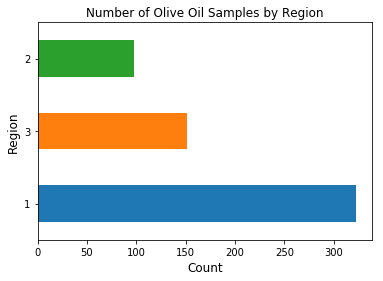

In [189]:
df.region.value_counts().plot('barh', 
    title="Number of Olive Oil Samples by Region")

plt.ylabel("Region", fontsize=12)                                                     
plt.xlabel("Count", fontsize=12)
plt.show()

- `plot` using `groupby` object to aggregate over region and obtain frequency `count()` 

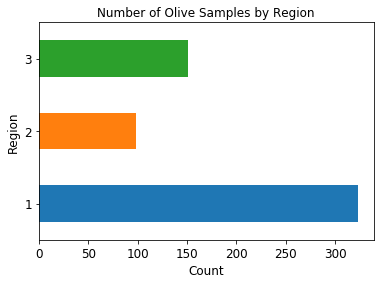

In [166]:
fig = plt.figure(figsize=(6,4))

df.groupby('region').count()['sub_region_desc'].plot(kind="barh",
                                                     fontsize=12,
                                                     title="Number of Olive Samples by Region")
                                                     
                                                                                                          
plt.ylabel("Region", fontsize=12)                                                     
plt.xlabel("Count", fontsize=12)
plt.show()


# ?? why can't I alter title size? plt.title does not work...

## Q17:   Create a horizontal frequency barplot for 'sub_region'

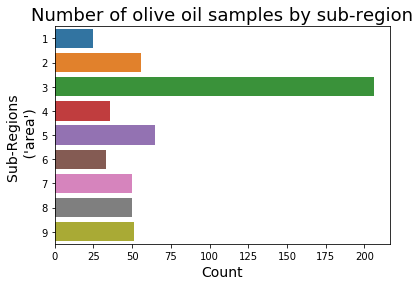

In [175]:
f, ax = plt.subplots(1,figsize=(6,4))
g = sns.countplot(y='area', data=df, orient="h")
# plt.title("Number of olive oil samples by region", fontsize=18)
plt.ylabel("Sub-Regions \n ('area')", fontsize=14)
plt.xlabel("Count", fontsize=14)
ax.set_title("Number of olive oil samples by sub-region", fontsize=18)
plt.show()

## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

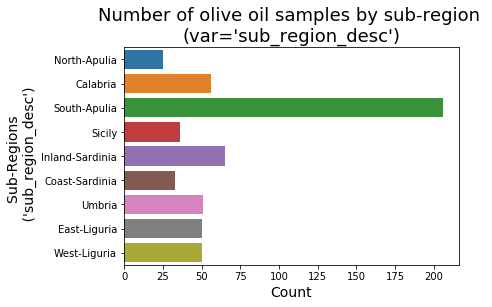

In [177]:
f, ax = plt.subplots(1,figsize=(6,4))
g = sns.countplot(y='sub_region_desc', data=df, orient="h")
# plt.title("Number of olive oil samples by region", fontsize=18)
plt.ylabel("Sub-Regions \n ('sub_region_desc')", fontsize=14)
plt.xlabel("Count", fontsize=14)
ax.set_title("Number of olive oil samples by sub-region \n(var='sub_region_desc')", fontsize=18)
plt.show()

- using `pd.Series.value_counts.plot()`

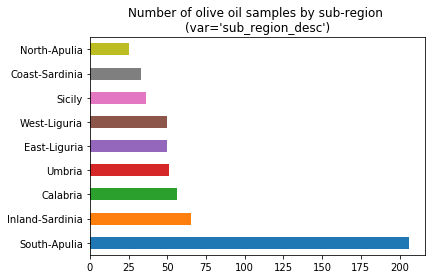

In [183]:
df.sub_region_desc.value_counts().plot('barh', 
    title="Number of olive oil samples by sub-region \n(var='sub_region_desc')")
plt.show()

In [164]:
df.describe()

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000,572.000,572.000,572.000,572.000,572.000,572.000,572.000,572.000,572.000
mean,1.699,4.600,1231.741,126.094,228.865,7311.748,980.528,31.888,58.098,16.281
std,0.860,2.357,168.592,52.494,36.745,405.810,242.799,12.969,22.030,14.083
min,1.000,1.000,610.000,15.000,152.000,6300.000,448.000,0.000,0.000,1.000
25%,1.000,3.000,1095.000,87.750,205.000,7000.000,770.750,26.000,50.000,2.000
50%,1.000,3.000,1201.000,110.000,223.000,7302.500,1030.000,33.000,61.000,17.000
75%,3.000,7.000,1360.000,169.250,249.000,7680.000,1180.750,40.250,70.000,28.000
max,3.000,9.000,1753.000,280.000,375.000,8410.000,1470.000,74.000,105.000,58.000


In [186]:
print(list(df.columns))

print(df.region.unique())  #1,2,3
print(df.area.unique())   # array([1, 2, 3, 4, 5, 6, 9, 7, 8])
print(df.sub_region_desc.unique())

['sub_region_desc', 'region', 'area', 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
[1 2 3]
[1 2 3 4 5 6 9 7 8]
['North-Apulia' 'Calabria' 'South-Apulia' 'Sicily' 'Inland-Sardinia'
 'Coast-Sardinia' 'Umbria' 'East-Liguria' 'West-Liguria']
